Aleksei Shokhirev / Portfolio project 2

# Predicting customer churn

Customer churn is when an existing customer stops buying a product, using a service or ends the relationship with a company. This is a common problem throughout different industries, and a company that can predict churn will be able to take proactive actions to retain valuable customers. In this project we will explore and visualize data of a telecommunication company, prepare that data for modeling, and predict customer churn using machine learning models such as LogisticRegression, DecisionTreeClassifier and RandomForestClassifier. Finally, we will visualize performance of the models by plotting ROC curve and Precision-Recall curve, compare metrics and select a model of the best performance. 

# Read and explore data

In [76]:
# import modules
import pandas as pd
import numpy as np
from scipy.stats import randint
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [77]:
# read dataset
churn = pd.read_csv('Churn.csv')
churn.head(2)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.7,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.7,OH,415,371-7191


In [78]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [79]:
churn.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [80]:
# check dataset for duplicates
duplicates = churn.duplicated(keep=False)
churn[duplicates]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone


# Feature selection and engineering

Some features such as 'Area_code' and 'Phone' are not useful when it comes to predicting customer churn because they do not provide any predictive power. Features that are highly correlated with other features can also be dropped, as they provide no additional information to a model. First, we will drop unnecessary features and then will create new features containing information about the average length of calls made by customers based on existing data. Finally, we will separate numerical and categorical data for further manipulation. 

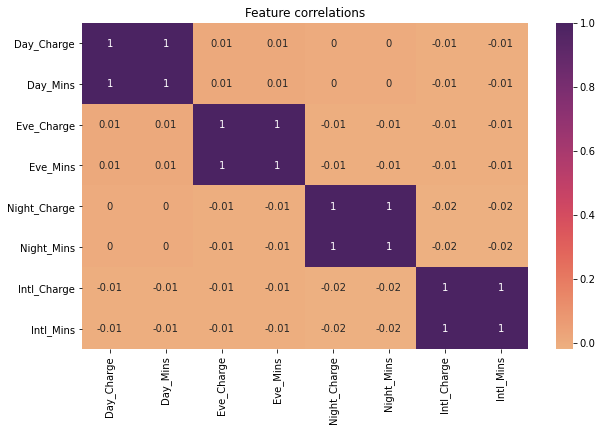

In [81]:
# check correlation of variables
plt.figure(figsize=(10, 6))
sns.heatmap(round(churn[['Day_Charge', 'Day_Mins', 'Eve_Charge', 'Eve_Mins', 
       'Night_Charge', 'Night_Mins', 'Intl_Charge', 'Intl_Mins']] .corr(), 2), annot=True, cmap='flare')
plt.title('Feature correlations')
plt.show()

As we can see, variables Day_Charge/Day_Mins, Eve_Charge/Eve_Mins, Night_Charge/Night_Mins and Intl_Charge/Intl_Mins are highly correlated. We will drop 'Day_Charge', 'Eve_Charge', 'Night_Charge' and 'Intl_Charge' variables because they do not provide any extra predictive power to the model. 

In [82]:
# drop 'Area_Code', 'Phone', 'Day_Charge', 'Eve_Charge', 'Night_Charge' and 'Intl_Charge'
churn = churn.drop(churn[['Area_Code', 'Phone', 'Day_Charge', 'Eve_Charge', 'Night_Charge', 'Intl_Charge']], axis=1)

# create extra features based on existing features
churn['Avg_Night_Calls'] = churn['Night_Mins'] / churn['Night_Calls']
churn['Avg_Day_Calls'] = churn['Day_Mins'] / churn['Day_Calls']
churn['Avg_Eve_Calls'] = churn['Eve_Mins'] / churn['Eve_Calls']
churn['Avg_Intl_Calls'] = churn['Intl_Mins'] / churn['Intl_Calls']
churn['Total_Min'] = churn['Night_Mins'] + churn['Day_Mins'] + churn['Eve_Mins'] + churn['Intl_Mins']

# check new variables
churn[['Avg_Night_Calls', 'Avg_Day_Calls', 'Avg_Eve_Calls', 'Avg_Intl_Calls', 'Total_Min']].head(2)

,Avg_Night_Calls,Avg_Day_Calls,Avg_Eve_Calls,Avg_Intl_Calls,Total_Min
0,2.689011,2.410000,1.993939,3.333333,717.2
1,2.469903,1.313821,1.898058,4.566667,625.2


In [83]:
# check for missing data
churn.isna().sum()

Account_Length      0
Vmail_Message       0
Day_Mins            0
Eve_Mins            0
Night_Mins          0
Intl_Mins           0
CustServ_Calls      0
Churn               0
Intl_Plan           0
Vmail_Plan          0
Day_Calls           0
Eve_Calls           0
Night_Calls         0
Intl_Calls          0
State               0
Avg_Night_Calls     0
Avg_Day_Calls       2
Avg_Eve_Calls       1
Avg_Intl_Calls     18
Total_Min           0
dtype: int64

Avg_Day_Calls, Avg_Eve_Calls and Avg_Intl_Calls variables have missing values because Day_Mins, Eve_mins and Intl_Mins have values = 0, which means that customers have not spent any minutes for day, evening or international calls. We can set missing values to zero.

In [84]:
# set missing values to 0
churn.fillna({'Avg_Day_Calls':0, 'Avg_Eve_Calls':0, 'Avg_Intl_Calls':0}, inplace=True)
churn.isna().sum()

Account_Length     0
Vmail_Message      0
Day_Mins           0
Eve_Mins           0
Night_Mins         0
Intl_Mins          0
CustServ_Calls     0
Churn              0
Intl_Plan          0
Vmail_Plan         0
Day_Calls          0
Eve_Calls          0
Night_Calls        0
Intl_Calls         0
State              0
Avg_Night_Calls    0
Avg_Day_Calls      0
Avg_Eve_Calls      0
Avg_Intl_Calls     0
Total_Min          0
dtype: int64

In [85]:
# separate target variable
target = ['Churn']

# seaparate numerical column names as a list
numerical = churn.dtypes[(churn.dtypes == 'int64') | (churn.dtypes == 'float64')].keys().tolist()

# store remaining column names as categorical
categorical = [x for x in churn.columns if x not in numerical + target]

# Exploratory data analysis

Now we will check if the churn variable has large differences in the number of observations in each class or class imbalance. After that, we will check if geographic regions play an important part in determining whether a customer will churn or not. Finally, we will plot the distribution of numerical variables and check them for skewness. If not all features appear to be well approximated by the normal distribution, we would have to consider applying a feature transformation.

In [86]:
# check data for class imbalance 
churn.groupby('Churn').size() / churn.shape[0] * 100

Churn
no     85.508551
yes    14.491449
dtype: float64

14% churned customers and roughly 86% not churned customers. The minority class is more than 5%, that is why we can use this data without resampling. 

In [87]:
# count the number of churners and non-churners by State
churn.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
                ..
WI     yes       7
WV     no       96
       yes      10
WY     no       68
       yes       9
Name: Churn, Length: 102, dtype: int64

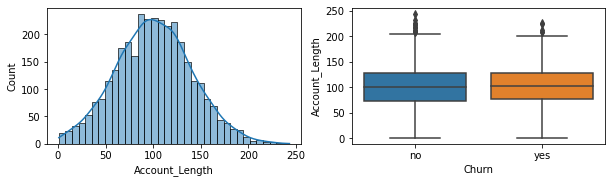

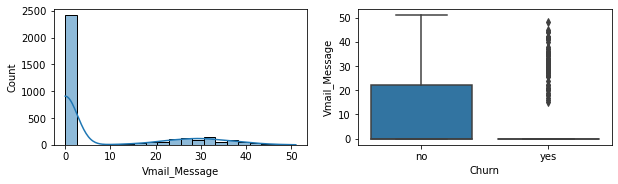

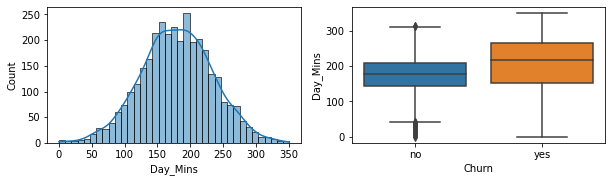

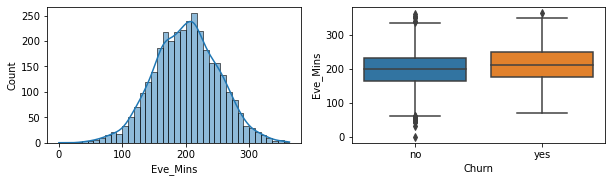

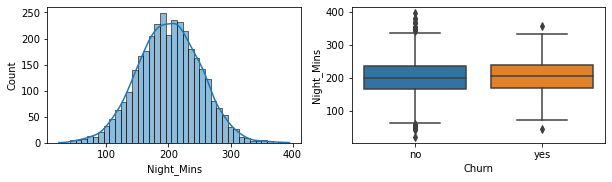

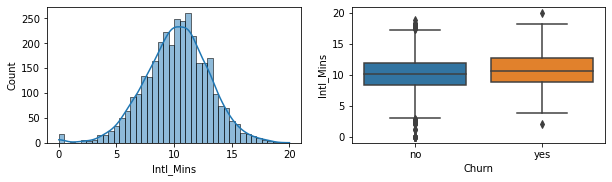

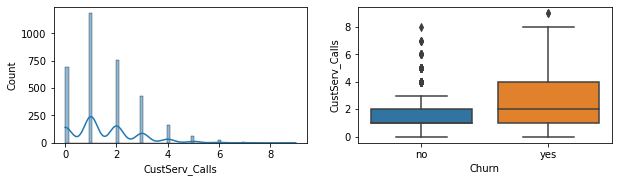

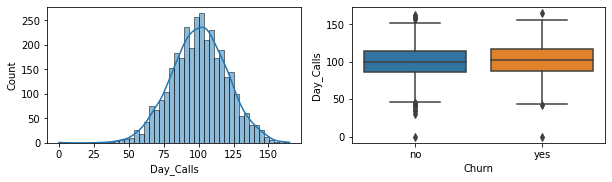

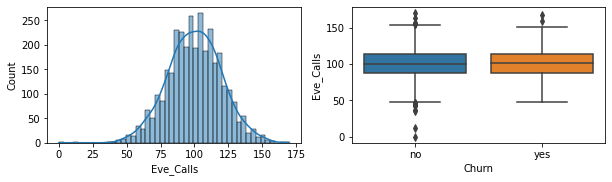

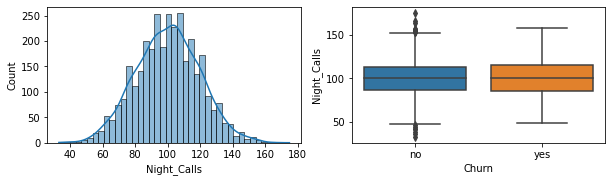

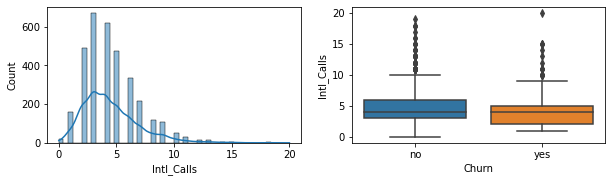

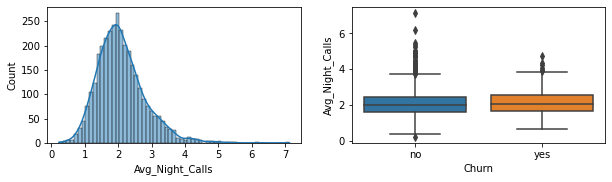

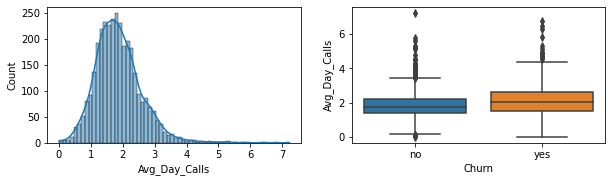

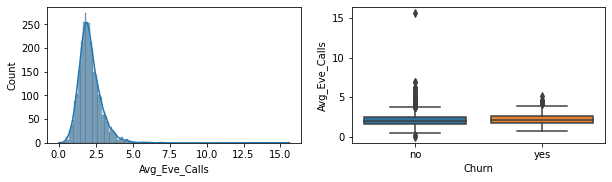

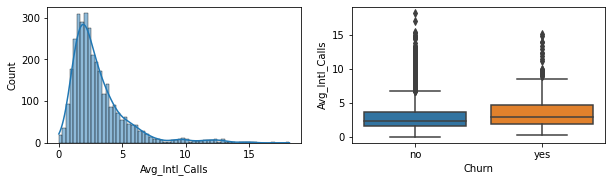

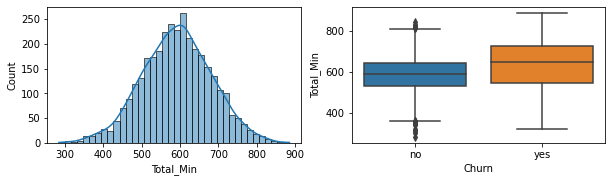

In [88]:
# check distribution of numerical variables
for c in numerical:
    plt.figure(figsize = [10, 2.5])
    plt.subplot(1, 2, 1)
    sns.histplot(x=c, kde=True, data=churn)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x='Churn', y=c, data=churn)
    plt.show()

According to the histogram, features such as Vmail_Message, CustServ_Calls, Intl_Calls, Avg_Night_Calls, Avg_Day_Calls, Avg_Eve_Calls, Avg_Intl_Calls have skewness, and we need transformation of some kind to fix this. The boxplot shows that customers who do churn end up leaving more customer service calls and spending more minutes daily and in total. On the other hand, customers who tend to churn less frequently left more Vmail messages and did more international calls. 

# Data preprocessing

Many machine learning models make certain assumptions about how the data is distributed and only accept numerical data types. First, we will fix skewness of features using boxcox transformation technique. After that, all categorical features need to be encoded numerically, which means that we will assign the value 1 to 'yes' and 0 to 'no' to the Vmail_Plan, Intl_Plan and Churn variables. Then, we will convert categorical variable 'State' into binary columns. Finally, we will normalize numerical features, which means that all of them should have the same average and std.

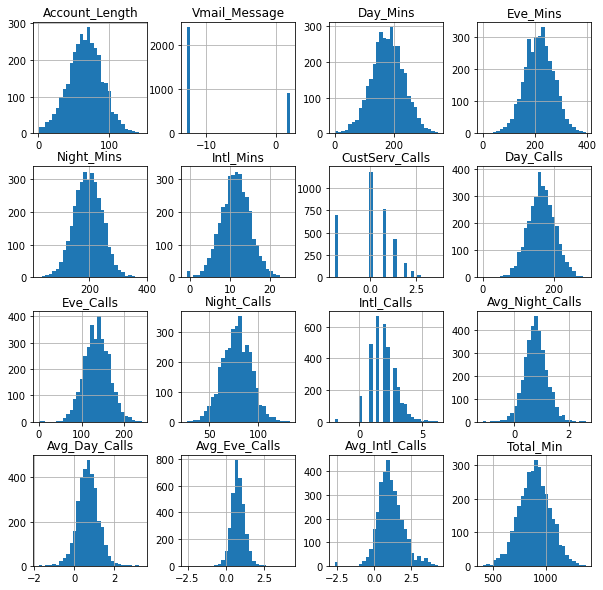

In [89]:
# add a constant to make sure our data is positive
churn[numerical] = churn[numerical] + 0.01

# transform data using boxcox method
def boxcox_df(x):
    x_boxcox, _ = stats.boxcox(x)
    return x_boxcox
churn[numerical] = churn[numerical].apply(boxcox_df, axis = 0)

# check distribution of transformed variables
churn[numerical].hist(figsize=(10, 10), bins=30)
plt.show()

In [90]:
# encoding binary features
churn.replace({'no':0, 'yes':1}, inplace = True)

# convert categorical variable 'State' into binary column
churn = pd.get_dummies(data=churn, columns=['State'], drop_first=True)

# center the mean and scale std
scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(churn[numerical])

# build DF
scaled_numerical = pd.DataFrame(scaled_numerical, columns = numerical)

# drop non_scaled numerical data
churn = churn.drop(columns = numerical, axis = 1)

# merge df with scaled numerical data
churn_scaled = churn.merge(right = scaled_numerical, how='left', left_index=True, right_index=True)

# LogisticRegression model

In [91]:
# create features and target variable
X = churn_scaled.drop('Churn', axis = 1)
y = churn_scaled['Churn']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

# instantiate LogisticRegression object
logreg = LogisticRegression(max_iter = 1000, random_state=1)

# fit the model to the training data
logreg.fit(X_train, y_train)

# predict labels on the test data
y_pred = logreg.predict(X_test)

# compute metrics
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  0.868
Precision:  0.6122448979591837
Recall:  0.2097902097902098


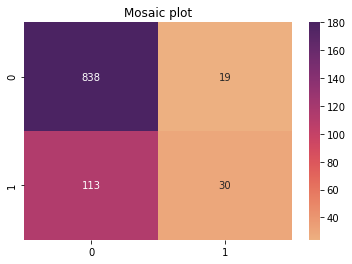

In [92]:
# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = '.0f', cmap = 'flare', vmin = 24, vmax = 180)
plt.title('Mosaic plot')
plt.show()

In our dataset there are nearly 6 times as many non-churners as there are churners. This indicates imbalanced classes which means that accuracy is not very useful metric. In our case recall and precision are the most useful metrics for evaluating the model performance. 

# Model tuning

Logistic regression from scikit-learn performs L2 regularization by default which only manages overfitting but not perform feature selection. L1 regularization called Lasso, can be called explicitly, and this approach performs feature selection by shrinking some of the model coefficients to zero. Now, we tune C parameter for L1 regularization to discover the one, which reduces model complexity while still maintaining good model performance metrics.

In [91]:
# create a list of C values
C_values = np.linspace(0.1, 10, 10)

# create an empty numpy array with zeros
l1_metrics = np.zeros((len(C_values), 5))

# add C candidates in the first column
l1_metrics[:, 0] = C_values

# iterate through C_values and build logistic regression with each
coef = []
accuracy = []
precision = []
recall = []
for x in C_values:
    logreg_l1 = LogisticRegression(max_iter = 1000, penalty = 'l1', C = x, solver = 'liblinear')
    logreg_l1.fit(X_train, y_train)
    y_pred = logreg_l1.predict(X_test)
    coef.append(np.count_nonzero(logreg_l1.coef_))
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
l1_metrics[:, 1] = coef
l1_metrics[:, 2] = accuracy
l1_metrics[:, 3] = precision
l1_metrics[:, 4] = recall
col_names = ['C', 'Non_zero_coef', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(l1_metrics, columns = col_names)

,C,Non_zero_coef,Accuracy,Precision,Recall
0,0.1,9.0,0.864,0.606061,0.139860
1,1.2,55.0,0.867,0.604167,0.202797
2,2.3,59.0,0.869,0.611111,0.230769
3,3.4,60.0,0.873,0.633333,0.265734
4,4.5,62.0,0.879,0.677419,0.293706
5,5.6,63.0,0.879,0.677419,0.293706
6,6.7,63.0,0.877,0.651515,0.300699
7,7.8,63.0,0.878,0.656716,0.307692
8,8.9,64.0,0.877,0.647059,0.307692
9,10.0,64.0,0.878,0.656716,0.307692


In [93]:
# instantiate LogisticRegression object
logreg = LogisticRegression(max_iter = 1000, penalty = 'l1', C = 4.5, solver = 'liblinear', random_state=1)

# fit the model to the training data
logreg.fit(X_train, y_train)

# predict labels on the test data
y_pred_log = logreg.predict(X_test)

# compute metrics
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

# print metrics
print('Accuracy: ', accuracy_log)
print('Precision: ', precision_log)
print('Recall: ', recall_log)

Accuracy:  0.879
Precision:  0.6774193548387096
Recall:  0.2937062937062937


C = 4.5 reduce a number of features to 62 and improve accuracy, precision and recall scores. Thus, regularization with C = 4.5 increased all metrics and reduced the model complexity. Accuracy increased from 0.868 to 0.879, Precision increased from 0.612 to 0.677 and Recall increased from 0.209 to 0.294.

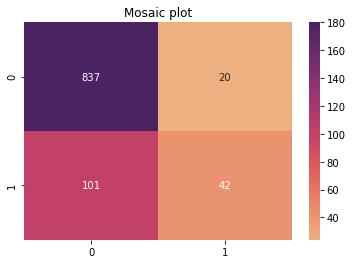

In [94]:
# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = '.0f', cmap = 'flare', vmin = 24, vmax = 180)
plt.title('Mosaic plot')
plt.show()

# Explore and interpret LogisticRegression coefficients

In [95]:
# combine feature names and coefficients into DF
feature_names = pd.DataFrame(X_train.columns, columns = ['Feature'])
log_coef = pd.DataFrame(np.transpose(logreg.coef_), columns = ['Coefficient'])
coefficients = pd.concat([feature_names, log_coef], axis = 1)

# calculate exponent of the logistic regression coefficients
coefficients['Exp_coefficient'] = np.exp(coefficients['Coefficient'])

# remove coefficients that are equal to zero
coefficients = coefficients[coefficients['Coefficient'] != 0]
coefficients.sort_values(by = ['Exp_coefficient'])

,Feature,Coefficient,Exp_coefficient
56,Night_Mins,-17.104346,3.729726e-08
54,Day_Mins,-16.554743,6.461995e-08
55,Eve_Mins,-16.203591,9.180572e-08
29,State_ND,-1.177345,3.080957e-01
64,Avg_Day_Calls,-1.055985,3.478496e-01
...,...,...,...
32,State_NJ,0.865724,2.376725e+00
41,State_SC,0.915932,2.499102e+00
27,State_MT,1.196706,3.309200e+00
0,Intl_Plan,2.242504,9.416878e+00


Features with largest effect on the odds of churning is Night_Mins, Day_Mins and Eve_Mins. Coefficient values less than 1 decrease the odds, and values more than 1 increase the odds.

# DecisionTreeClassifier model

In [96]:
# instantiate DecisionTreeClassifier
mytree = DecisionTreeClassifier(random_state=1)

# fit the model
mytree.fit(X_train, y_train)

# predict labels on both training and test data
y_pred_train = mytree.predict(X_train)
y_pred_test = mytree.predict(X_test)

# compute performance metrics
print('Accuracy train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy test: ', accuracy_score(y_test, y_pred_test))
print('Precision train: ', precision_score(y_train, y_pred_train))
print('Precision test: ', precision_score(y_test, y_pred_test))
print('Recall train: ', recall_score(y_train, y_pred_train))
print('Recall test: ', recall_score(y_test, y_pred_test))

Accuracy train:  1.0
Accuracy test:  0.921
Precision train:  1.0
Precision test:  0.7105263157894737
Recall train:  1.0
Recall test:  0.7552447552447552


Those metrics indicate that the tree memorized the pattern and rules for training data perfectly but failed to generalize the rules for testing data. To manage this, we need to reduce the size of the tree. Decision tree is very prone to over-fitting as it will build rules to memorize all patterns down to each observation level. We need to limit the number of if-else rules by providing max-depth parameter.

# Model tuning

In [156]:
# first, create a list of max_depth candidates
depth_list = np.arange(2, 15)

# create a numpy array with zeros
depth_tuning = np.zeros((len(depth_list), 4))

# store depth candidates in the first column
depth_tuning[:, 0] = depth_list

# iterate through the depth values and fit a decision tree for each
accuracy = []
precision = []
recall = []
for x in depth_list:
    metree_depth = DecisionTreeClassifier(max_depth = x)
    metree_depth.fit(X_train, y_train)
    y_pred = metree_depth.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
depth_tuning[:, 1] = accuracy
depth_tuning[:, 2] = precision
depth_tuning[:, 3] = recall
col_names = ['Max_depth', 'Accuracy', 'Precision', 'Recall']
pd.DataFrame(depth_tuning, columns = col_names)

,Max_depth,Accuracy,Precision,Recall
0,2.0,0.890,0.636364,0.538462
1,3.0,0.908,0.849315,0.433566
2,4.0,0.935,0.933333,0.587413
3,5.0,0.944,0.837209,0.755245
4,6.0,0.946,0.861789,0.741259
5,7.0,0.950,0.860465,0.776224
6,8.0,0.942,0.819549,0.762238
7,9.0,0.937,0.798507,0.748252
8,10.0,0.944,0.822222,0.776224
9,11.0,0.944,0.817518,0.783217


With max_depth = 7 the tree model produces good accuracy, precision and recall and reduce the model complexity.

In [97]:
# instantiate DecisionTreeClassifier
mytree_tuned = DecisionTreeClassifier(max_depth = 7, random_state=111)

# fit the model
mytree_tuned.fit(X_train, y_train)

# predict labels on both training and test data
y_pred_train_tree = mytree_tuned.predict(X_train)
y_pred_test_tree = mytree_tuned.predict(X_test)

# compute metrics
accuracy_train_tree = accuracy_score(y_train, y_pred_train_tree)
accuracy_test_tree = accuracy_score(y_test, y_pred_test_tree)
precision_train_tree = precision_score(y_train, y_pred_train_tree)
precision_test_tree = precision_score(y_test, y_pred_test_tree)
recall_train_tree = recall_score(y_train, y_pred_train_tree)
recall_test_tree = recall_score(y_test, y_pred_test_tree)

# compute performance metrics
print('Accuracy train: ', accuracy_train_tree)
print('Accuracy test: ', accuracy_test_tree)
print('Precision train: ', precision_train_tree)
print('Precision test: ', precision_test_tree)
print('Recall train: ', recall_train_tree)
print('Recall test: ', recall_test_tree)

Accuracy train:  0.9747106729532791
Accuracy test:  0.947
Precision train:  0.976271186440678
Precision test:  0.8409090909090909
Recall train:  0.8470588235294118
Recall test:  0.7762237762237763


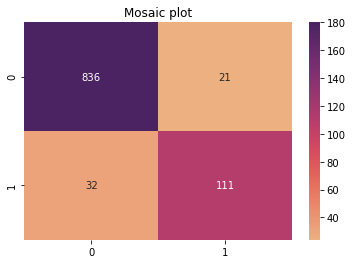

In [98]:
# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_tree)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = '.0f', cmap = 'flare', vmin = 24, vmax = 180)
plt.title('Mosaic plot')
plt.show()

# Visualize and interpret DecisionTreeClassifier model

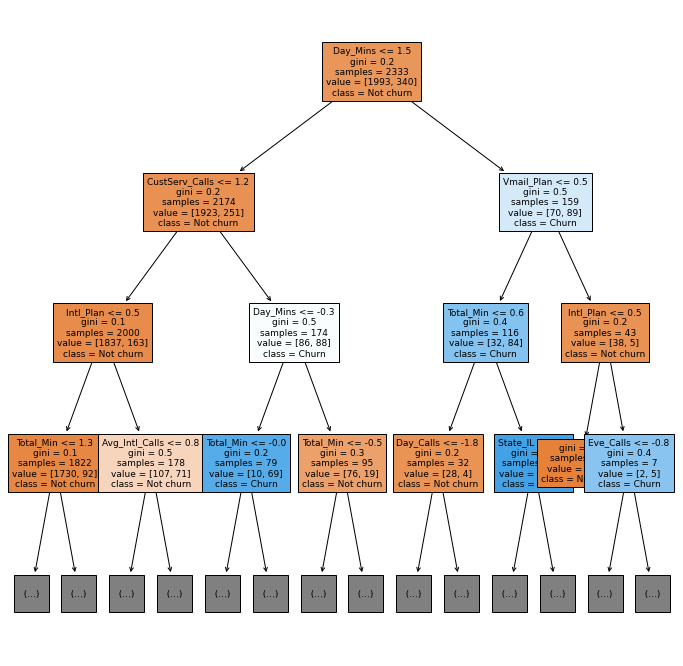

In [99]:
plt.figure(figsize = (12, 12))
tree.plot_tree(decision_tree = mytree_tuned, max_depth = 3,
              feature_names = X_train.columns,
              class_names = ['Not churn', 'Churn'], filled = True,
              precision = 1, fontsize = 9)
plt.show()

We can interpret the model as a set of if-else rules starting from the top. First row in each leaf is the rule that is then branched by whether or not it is met. True and False labels (left-True, right-False) flowing from parent leaf to the child leaves. Day_Mins is the most important feature. If Day_Mins > 1.5 and customer do not have Vmail_Plan, then it is highly likely that customers will churn.

# RandomForestClassifier model

In [100]:
# instantiate RandomForestClassifier
clf = RandomForestClassifier(random_state=1)

# fit it to the training data
clf.fit(X_train, y_train)

# predict labels on both training and test data
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# compute performance metrics
print('Accuracy train: ', accuracy_score(y_train, y_pred_train))
print('Accuracy test: ', accuracy_score(y_test, y_pred_test))
print('Precision train: ', precision_score(y_train, y_pred_train))
print('Precision test: ', precision_score(y_test, y_pred_test))
print('Recall train: ', recall_score(y_train, y_pred_train))
print('Recall test: ', recall_score(y_test, y_pred_test))

Accuracy train:  1.0
Accuracy test:  0.939
Precision train:  1.0
Precision test:  1.0
Recall train:  1.0
Recall test:  0.5734265734265734


# Model tuning

In [292]:
# tuning hyperparameters using RandomizedSearchCV
param_dist = {'n_estimators':np.arange(10, 51), 
              'max_depth':[3, None],
             'max_features':['auto', 'sqrt', 'log2'],
             'bootstrap':[True, False],
             'criterion':['gini', 'entropy']}
# instantiate RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_dist)

# fit it to the training data
random_search.fit(X_train, y_train)

# predict labels on both training and testing data
y_pred_train_clf = random_search.predict(X_train)
y_pred_test_clf = random_search.predict(X_test)

# compute performance metrics
print('Accuracy train: ', accuracy_score(y_train, y_pred_train_clf))
print('Accuracy test: ', accuracy_score(y_test, y_pred_test_clf))
print('Precision train: ', precision_score(y_train, y_pred_train_clf))
print('Precision test: ', precision_score(y_test, y_pred_test_clf))
print('Recall train: ', recall_score(y_train, y_pred_train_clf))
print('Recall test: ', recall_score(y_test, y_pred_test_clf))

# print best parameters of the model
print(random_search.best_params_)

Accuracy train:  1.0
Accuracy test:  0.949
Precision train:  1.0
Precision test:  0.9693877551020408
Recall train:  1.0
Recall test:  0.6643356643356644
{'n_estimators': 33, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy', 'bootstrap': False}


In [101]:
# create a tuned model
clf_tuned = RandomForestClassifier(n_estimators=27, max_features='auto', max_depth=None, criterion='entropy', bootstrap=False,
                                  random_state=111)

# fit it to the training data
clf_tuned.fit(X_train, y_train)

# predict labels on both training and test data
y_pred_train_clf_tuned = clf_tuned.predict(X_train)
y_pred_test_clf_tuned = clf_tuned.predict(X_test)

# compute metrics
accuracy_train_forest = accuracy_score(y_train, y_pred_train_clf_tuned)
accuracy_test_forest = accuracy_score(y_test, y_pred_test_clf_tuned)
precision_train_forest = precision_score(y_train, y_pred_train_clf_tuned)
precision_test_forest = precision_score(y_test, y_pred_test_clf_tuned)
recall_train_forest = recall_score(y_train, y_pred_train_clf_tuned)
recall_test_forest = recall_score(y_test, y_pred_test_clf_tuned)

# compute performance metrics
print('Accuracy train: ', accuracy_train_forest)
print('Accuracy test: ', accuracy_test_forest)
print('Precision train: ', precision_train_forest)
print('Precision test: ', precision_test_forest)
print('Recall train: ', recall_train_forest)
print('Recall test: ', recall_test_forest)

Accuracy train:  1.0
Accuracy test:  0.953
Precision train:  1.0
Precision test:  0.9897959183673469
Recall train:  1.0
Recall test:  0.6783216783216783


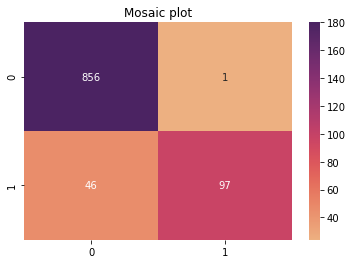

In [102]:
# generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_clf_tuned)

# plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = '.0f', cmap = 'flare', vmin = 24, vmax = 180)
plt.title('Mosaic plot')
plt.show()

# Feature importances

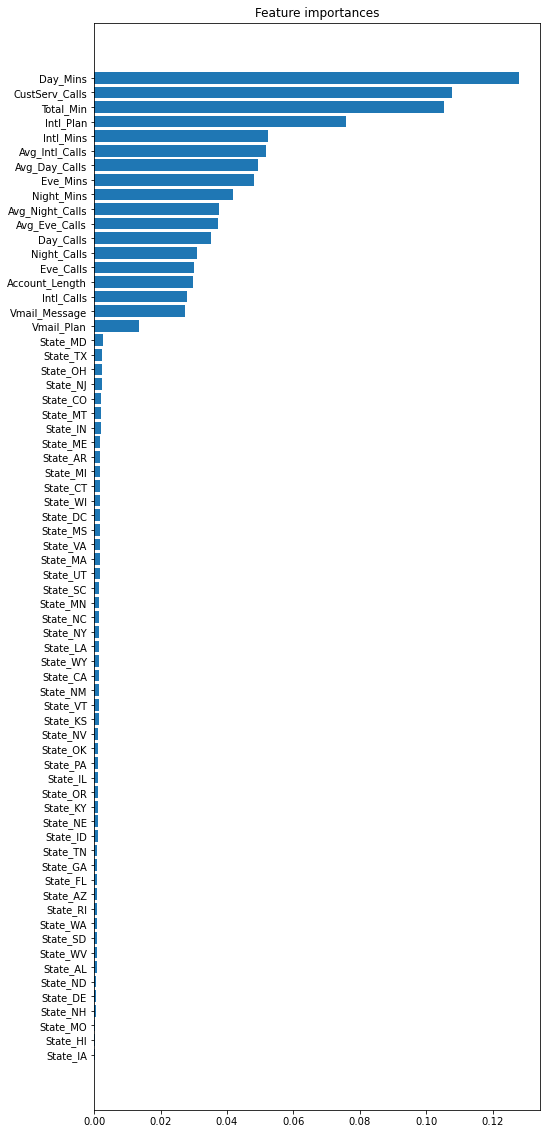

In [103]:
# Calculate feature importances
importances = clf_tuned.feature_importances_

# sort importances
# .argsort() method sorts an array in ascending order and returns the indices
sorted_index = np.argsort(importances)

# create labels
labels = X.columns[sorted_index]

# create a plot
plt.figure(figsize = (8, 20))
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.title('Feature importances')
plt.show()

# Model selection

As the final step, we will plot ROC curve and Precision-Recall curve, compute area under the curve (AUC), average precision (AP) and F1 score for all three models. After that, we will compare all metrics and select the model of the best performance for predicting customer churn. 

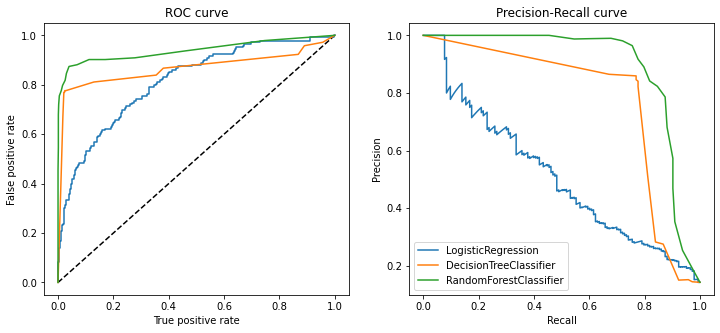

In [104]:
# compute predicted probabilities 
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_tree = mytree_tuned.predict_proba(X_test)[:, 1]
y_pred_prob_forest = clf_tuned.predict_proba(X_test)[:, 1]

# compute Area under the curve AUC
auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)
auc_forest = roc_auc_score(y_test, y_pred_prob_forest)

# compute Average Precision AP
ap_logreg = average_precision_score(y_test, y_pred_prob_logreg)
ap_tree = average_precision_score(y_test, y_pred_prob_tree)
ap_forest = average_precision_score(y_test, y_pred_prob_forest)

# calculate metrics for ROC curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_test, y_pred_prob_forest)

# generate precision-recall curve values
precision_logreg, recall_logreg, thresholds_logreg = precision_recall_curve(y_test, y_pred_prob_logreg)
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_prob_tree)
precision_forest, recall_forest, thresholds_forest = precision_recall_curve(y_test, y_pred_prob_forest)

# plot ROC curve and Precision-Recall curve
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot([0, 1], [0, 1], 'k--')
ax[0].plot(fpr_logreg, tpr_logreg, label = 'LogisticRegression')
ax[0].plot(fpr_tree, tpr_tree, label = 'DecisionTreeClassifier')
ax[0].plot(fpr_forest, tpr_forest, label = 'RandomForestClassifier')
ax[1].plot(recall_logreg, precision_logreg, label = 'LogisticRegression')
ax[1].plot(recall_tree, precision_tree, label = 'DecisionTreeClassifier')
ax[1].plot(recall_forest, precision_forest, label = 'RandomForestClassifier')
ax[0].set_xlabel('True positive rate')
ax[0].set_ylabel('False positive rate')
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[0].set_title('ROC curve')
ax[1].set_title('Precision-Recall curve')
plt.legend()
plt.show()

In [105]:
# compute f1 score
f1_logreg = f1_score(y_test, y_pred_log)
f1_tree = f1_score(y_test, y_pred_test_tree)
f1_forest = f1_score(y_test, y_pred_test_clf_tuned)

In [106]:
# combine all metrics in DF
all_metrics = pd.DataFrame(
    np.array([[auc_logreg, ap_logreg, f1_logreg, accuracy_log, precision_log, recall_log], 
                                    [auc_tree, ap_tree, f1_tree, accuracy_test_tree, 
                                     precision_test_tree, recall_test_tree], 
                                    [auc_forest, ap_forest, f1_forest, accuracy_test_forest, 
                                     precision_test_forest, recall_test_forest]]), 
    columns = ['AUC', 'Average precision', 'F1 score', 'Accuracy', 'Precision', 'Recall'], 
    index=['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier'], dtype=np.float64)

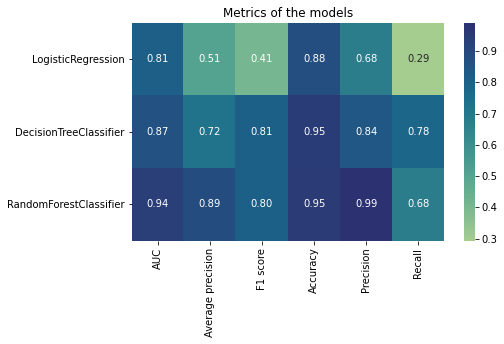

In [107]:
# plot all_metrics
plt.figure(figsize = (7, 4))
sns.heatmap(data = all_metrics, annot=True, cmap='crest', fmt='.2f')
plt.title('Metrics of the models')
plt.show()

As we can see, the logistic regression model shows the worst performance across all metrics, and we cannot use it for predicting customer churn. According to the both ROC curve and Precision-Recall curve plots, RandomForestClassifier has the highest area under the curve (0.94) and highest average precision (0.89). However, DecisionTreeClassifier has highest value of Recall metric (0.78) which means that the decision tree model has lower False Negative value and higher True Positive value than RandomForestClassifier and works better on predicting minority class 'Churn'. In our dataset there are nearly 6 times as many non-churners as there are churners. This indicates imbalanced classes and Recall metric is critical in this particular situation. Moreover, the DecisionTreeClassifier model has the highest F1_score value (0.81) which indicates the best tradeoff between Precision and Recall. That is why, the DecisionTreeClassifier model is the best option for predicting customer churn. 